<a href="https://colab.research.google.com/github/M0LLYDAYU/Computer-Networking-A-Top-Down-Approach-NOTES/blob/master/tutoral3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Warter-filling Question** Deduce the Lagrange dual problem in Example 5.2 Water-filling in Boyd's Textbook. Then, implement the water-filling algorithm using an iterative bisection search for the optimal Lagrange dual solution (i.e., $\nu$) in Jupyter Notebook. Test your algorithm for a number of test cases using different problem parameters (e.g., adapt the number of channels n and $\alpha$) and plot the results.

**Deduce the Lagrange Dual Problem**$$\\ L(x,\lambda, v) =-\sum\nolimits_{i=1}^N log(\alpha_i + x_i) - \lambda x+ v(1^Tx-1) \\ $$
Therefore the dual function is   $$\\ \text{maximize}\quad g(\lambda, \nu)=n + \sum^n_{i=1}log(\nu-\lambda_i) - \alpha_i(\nu-\lambda_i) 
\\
\text{subject to}\quad \lambda \succeq 0, \sum^n_{i=1}\frac{1}{\nu-\lambda_i}-\alpha_i=1
$$


[0.32, 0.32, 0.020000000000000018, 0.32, 0.020000000000000018]
1.923076923076923


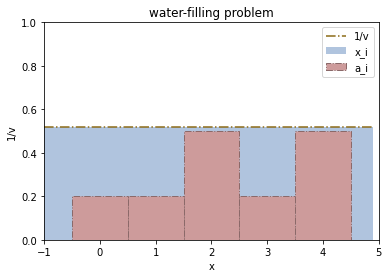

[0, 0, 0, 0, 0, 0.25, 0.25, 0.25, 0.25]
2.8571428571428568


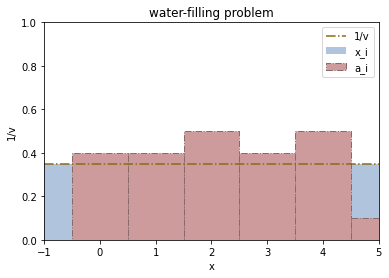

[0.44, 0.24, 0.040000000000000036, 0, 0.14, 0.14]
1.5625


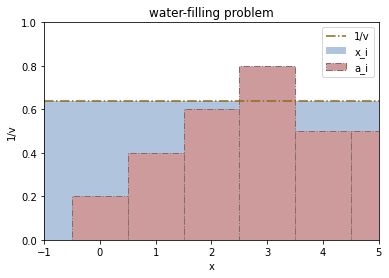

In [25]:
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import matplotlib.mlab as mlab  

  

def water_filling(alpha, v_init):
    left = 0
    right = len(alpha)-1
    v = v_init
    while left <= right:
        x_i = list(range(len(alpha)))     
        for i, x in enumerate(x_i):
            a_i = alpha[i]
            x_i[i] = max(1 / v - a_i, 0)
        X = sum(x_i)
        if X < 1:
            right = v
            v = (left + right) / 2
        elif X > 1:
            left = v
            v = (left + right) / 2
        else:
            print(x_i)
            print(v)
            break
        if left >= right:
            print("the result is worng!")
            break
            
    x = np.arange(-1, len(alpha), 0.1)
    line1 = [1/v]*len(x)
    line2 = 1-len(x)
    plt.xlim((-1,5))
    plt.ylim((0,1))
  
    plt.hlines(1/v, x[0], x[-1], colors ='#8B6914' , linestyles = "-.", label="1/v")
    plt.fill_between(x, line1, line2, facecolor='#B0C4DE', label="x_i")
    plt.bar(range(len(alpha)), alpha,1, color='#CD9B9B', ec='#8B6969', ls='-.', label="a_i")
    
    plt.xlabel("x")
    plt.ylabel("1/v")
    plt.title("water-filling problem")
  
    plt.legend()
    plt.show() 

if __name__ == '__main__':
  water_filling([0.2, 0.2, 0.5, 0.2, 0.5], 10000)
  water_filling([0.4, 0.4, 0.5, 0.4, 0.5, 0.1, 0.1, 0.1, 0.1], 10000)
  water_filling([0.2, 0.4, 0.6, 0.8, 0.5, 0.5], 10000)


**5.1 A simple example.** Consider the optimization problem
\begin{aligned}
\text{minimize  }\quad& x^2 + 1 \\
\text{subject to  }\quad& (x-2)(x-4) \leq 0 \\
\text{with }\quad x \in&R 
\end{aligned}


(a) Analysis of primal problem. Give the feasible set, the optimal value and the optimal solution.


**Answer:** 
The feasible set is [2,4], the only optimal value is x* = 2, and the optimal solution is p* = 5


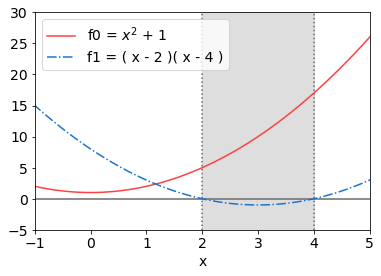

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.1)
y1 = x * x +1
y2 = x * x - 6 * x + 8

plt.axhline(y=0,ls="-",c="#696969")
plt.axvline(x=2,ls=":",c="#696969")
plt.axvline(x=4,ls=":",c="#696969")
plt.xlim((-1,5))
plt.ylim((-5,30))
plt.plot(x,y1,color = '#FF4040', label = 'f0 = 'r'$x ^ 2$'' + 1')
plt.plot(x,y2,'-.', color = '#1874CD', label = 'f1 = ( x - 2 )( x - 4 )')
plt.axvspan(2, 4, alpha=0.5, color='#BEBEBE')
plt.xlabel('x')
plt.legend()
plt.show()


(b) Lagrangian and dual function. Plot the objective x^2 +1 versus x. On the same plot, show the feasible set, optimal point and value, and plot the Lagrangian L(x, λ) versus x for a few positive values of λ. Verify the lower bound property (p⋆ ≥ infx L(x, λ) for λ ≥ 0). Derive and sketch the Lagrange dual function g.


**Answer:** 

1.   The Lagrangian Function is:
\begin{aligned}
L(x,\lambda)= x^2 + 1 +  \lambda (x - 2)(x-4) = (1+\lambda)x^2 -6\lambda x + (1+ 8\lambda)\\
\end{aligned}

2. set $\lambda $ = 1, 2, 3, 4
\begin{aligned}
&L1(x,1)= 2x^2 -6x + 9 \\
&L2(x,2)= 3x^2 -12x + 17 \\
&L3(x,3)= 4x^2 -18x + 25 \\
&L4(x,4)= 5x^2 -24x + 33 \\
\end{aligned}


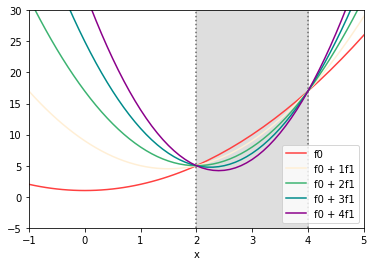

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.1)
y1 = x * x +1
y2 = 2 * x * x - 6 * x + 9
y3 = 3 * x * x - 12 * x + 17
y4 = 4 * x * x - 18 * x + 25
y5 = 5 * x * x - 24 * x + 33
plt.axvline(x=2,ls=":",c="#696969")#adding axvline
plt.axvline(x=4,ls=":",c="#696969")#adding axvline
plt.xlim((-1,5))
plt.ylim((-5,30))
plt.plot(x,y1,color = '#FF4040', label = 'f0')
plt.plot(x,y2,color = '#FFEFD5', label = 'f0 + 1f1')
plt.plot(x,y3,color = '#3CB371', label = 'f0 + 2f1')
plt.plot(x,y4,color = '#008B8B', label = 'f0 + 3f1')
plt.plot(x,y5,color = '#8B008B', label = 'f0 + 4f1')
plt.xlabel('x')
plt.axvspan(2, 4, alpha=0.5, color='#BEBEBE') # filling areas
plt.legend()
plt.show()

3.
\begin{aligned}
p^* &= g(  \lambda ) = 2 (1 +  \lambda\ )x - 6 \lambda\ = 0\\
\\
&\therefore x  = 3 \lambda / (1 + \lambda) \\
\\
&\because 1 + \lambda \geq 0 \\
\\
\end{aligned}
$$
\therefore \text{the dual function is }\quad g(  \lambda )=\left\{
\begin{aligned}
& -9\lambda ^2 / (1 + \lambda) + 1 + 8 \lambda & \lambda  > -1 \\
& -\infty  & \lambda  \leq -1\\
\end{aligned}
\right.
$$

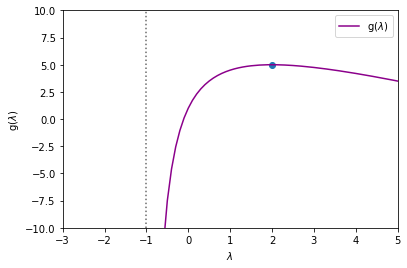

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.1)
interval0 = [1 if (i>-1) else float('-inf') for i in x]
y1 =( (- 9 * x * x / (1+x) + 1 + 8 * x) ) * interval0

plt.axvline(x=-1,ls=":",c="#696969")#adding axvline
plt.xlim((-3,5))
plt.ylim((-10,10))
plt.plot(x,y1, color = '#8B008B', label = 'g('r'$\lambda$'')')
plt.scatter([2],[5])
plt.xlabel(r'$\lambda$')
plt.ylabel('g('r'$\lambda$'')')
plt.legend()
plt.show()

(c) **Lagrange dual problem.** State the dual problem, and verify that it is a concave ⋆
maximization problem. Find the dual optimal value and dual optimal solution λ . Does strong duality hold?

**Answer:**
1. lagrange dual problem
\begin{aligned}
&\text{maxmize  }\quad -9\lambda ^2 / (1 + \lambda) + 1 + 8 \lambda\\
&\text{subject to  }\quad \lambda \geq 0\\
\end{aligned}

2. According to the figure, it is obvious that it is strong duality hold, because the $\lambda$ = 2, with d* = 5 = p*.


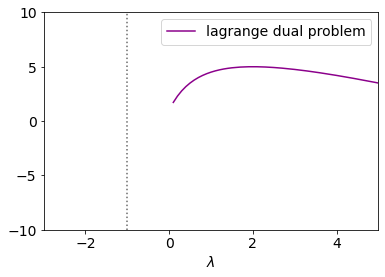

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.1)
interval0 = [1 if (i>=0) else float('-inf') for i in x]
y1 =( (- 9 * x * x / (1+x) + 1 + 8 * x) ) * interval0

plt.axvline(x=-1,ls=":",c="#696969")#adding axvline
plt.xlim((-3,5))
plt.ylim((-10,10))
plt.plot(x,y1, color = '#8B008B', label = 'lagrange dual problem')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.show()

(d)**Sensitivity analysis.** Let p⋆(u) denote the optimal value of the problem 
\begin{aligned}
\text{minimize  }\quad& x^2 + 1 \\
\text{subject to  }\quad& (x-2)(x-4) \leq u \\
\end{aligned}
as a function of the parameter u. Plot p (u). Verify that dp* (0)/du = −λ* .

**Answer:**
1. 
\begin{aligned}
&\text{For  }u < -1, \text{the perturbed problem is infeasible, becasuse   } inf_x ( x ^2 -6x +8) = -1,&\\
&\text{For  }u \geq -1, \text{the interval of feasible set is   } [3 - \sqrt{(1+u)}, 3 + \sqrt{(1+u)}],&\\
&\text{There are two roots of   } x^2-6x + 8, \text{For   } -1\leq u \leq 8, \text{the optimal is x*(u) } = 3 - \sqrt{(1+u)}\\
&\text{For } u \geq 8, \text{the optimum value is the minimum value of } f_0= 1
\end{aligned}
$$
\therefore p^*( u )=\left\{
\begin{aligned}
& \infty& u < -1\\
& 11 + u - 6 \sqrt{(1+u)} &-1\leq u \leq 8 \\
& 1 & u  \geq 8\\
\end{aligned}
\right.
$$

2. According to the figuer as below:$$ dp^*(0) / du = -2 = - \lambda^ *$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


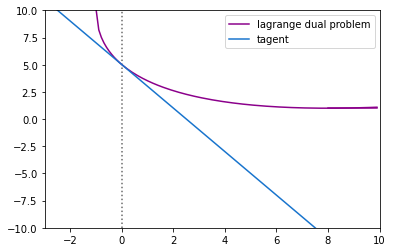

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(-3,10,0.1)
interval0 = [float("inf") if (i<-1) else float("-inf") for i in x]
interval1 = [1 if (i>= 8) else float("-inf") for i in x]
y1 = interval0
y2 = 11+ x - 6* np.sqrt(1+x) 
y3 = 1 * interval1
y4 = 5 - 2 * x 


plt.axvline(x=0,ls=":",c="#696969")#adding axvline
plt.xlim((-3,10))
plt.ylim((-10,10))
plt.plot(x,y1, color = '#8B008B', label = 'lagrange dual problem')
plt.plot(x,y2, color = '#8B008B')
plt.plot(x,y3, color = '#8B008B')
plt.plot(x,y4, color = '#1874CD', label = 'tagent')
plt.legend()
plt.show()